## Scratch paper

### Demographics

#### AGE

===== Age Summary Table =====
       count       mean        std   min   25%   50%   75%   max
age  60753.0  59.327078  17.224448  18.0  46.0  60.0  74.0  99.0


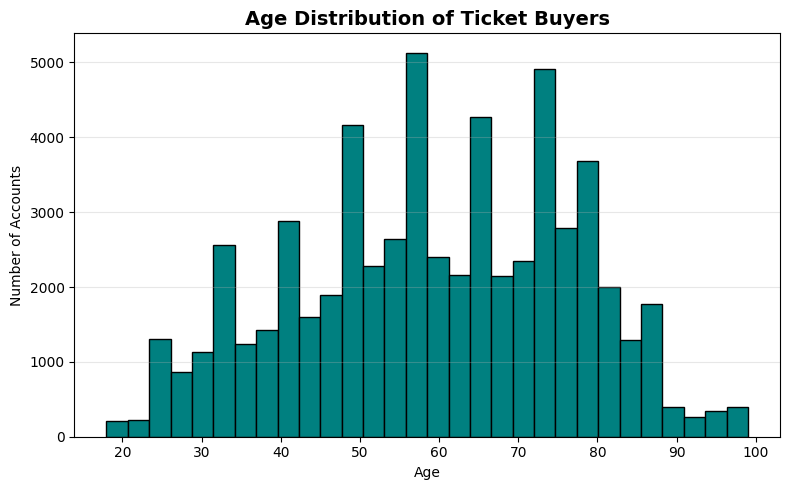

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# Summary Table for Age
age_summary = df['age'].describe().to_frame().T  # convert to table format
print("===== Age Summary Table =====")
print(age_summary)

# Histogram Visualization of Distribution
plt.figure(figsize=(8, 5))
plt.hist(df['age'].dropna(), bins=30, color='#008080', edgecolor='black')
plt.title('Age Distribution of Ticket Buyers', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Accounts')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


#### EDUCATION

===== Education Summary Table =====
           Education  Count  Percent
         High School  20989    39.13
Vocational/Technical     22     0.04
             College  14228    26.53
     Graduate School  18395    34.30


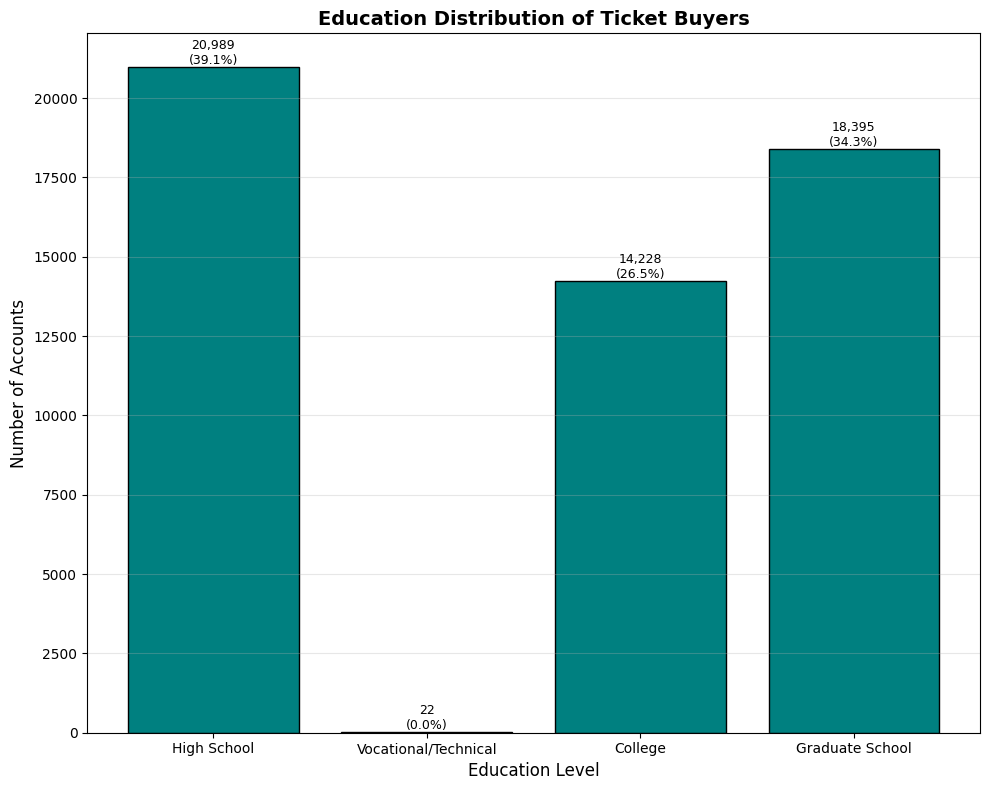

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load data ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# === Define custom order for education levels ===
edu_order = ["High School", "Vocational/Technical", "College", "Graduate School"]

# === Summary table for 'education' ===
edu_counts = df['education'].value_counts(dropna=True)
edu_perc = (edu_counts / edu_counts.sum() * 100).round(2)

summary_table = pd.DataFrame({
    'Education': edu_counts.index,
    'Count': edu_counts.values,
    'Percent': edu_perc.values
})

# Reorder according to the specified order
summary_table['Education'] = pd.Categorical(summary_table['Education'], categories=edu_order, ordered=True)
summary_table = summary_table.sort_values('Education').dropna(subset=['Education'])

print("===== Education Summary Table =====")
print(summary_table.to_string(index=False))

# === Bar chart: Education distribution (custom order) ===
plt.figure(figsize=(10, 8))

bars = plt.bar(
    summary_table['Education'],
    summary_table['Count'],
    width=0.8,
    color='#008080',
    edgecolor='black'
)

# Add count + percent labels above bars
for bar, count, perc in zip(bars, summary_table['Count'], summary_table['Percent']):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{count:,}\n({perc:.1f}%)",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Education Distribution of Ticket Buyers', fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Accounts', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


#### MARITAL STATUS

===== Marital Status Summary Table =====
     Marital Status  Count  Percent
            Married  33853    50.12
             Single  25893    38.34
Unknown/Unspecified   5338     7.90
    Inferred Single   2210     3.27
   Inferred Married    245     0.36


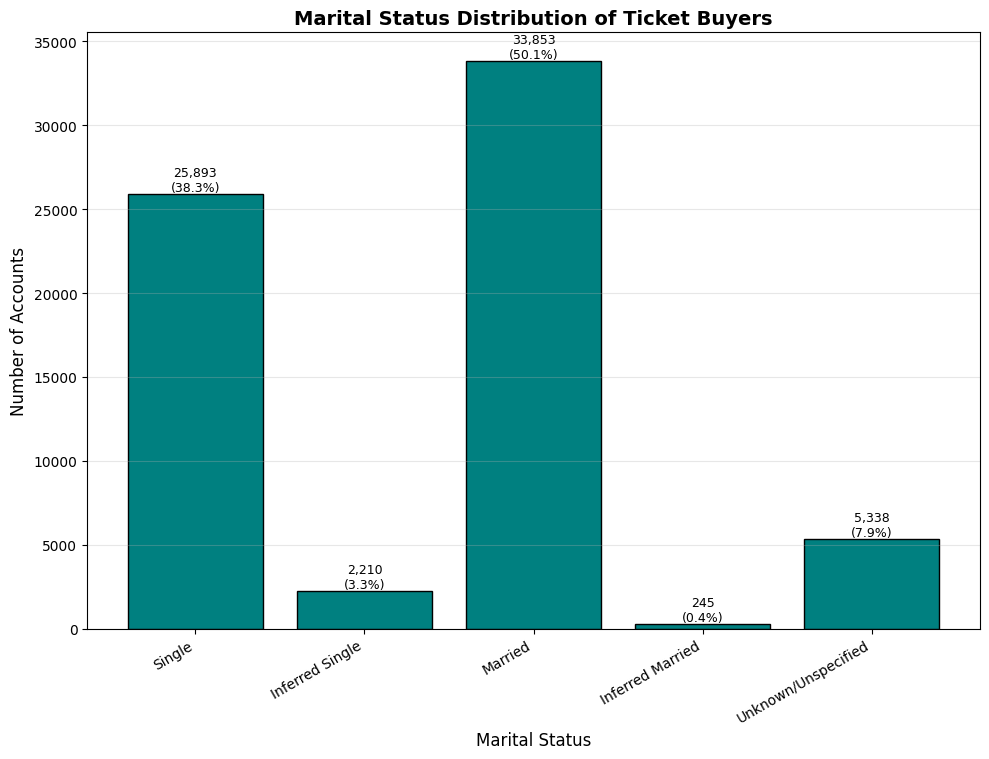

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load data ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# === Prepare marital_status (treat NaN as 'Unknown/Unspecified') ===
marital = df['marital_status'].fillna('Unknown/Unspecified')

# === Summary table: counts + percentages ===
counts = marital.value_counts(dropna=False)
perc = (counts / counts.sum() * 100).round(2)

summary_table = (
    pd.DataFrame({'Marital Status': counts.index, 'Count': counts.values, 'Percent': perc.values})
    .sort_values('Count', ascending=False)
    .reset_index(drop=True)
)

print("===== Marital Status Summary Table =====")
print(summary_table.to_string(index=False))

# === Custom display order (present categories are kept; others ignored if absent) ===
desired_order = [
    "Single",
    "Inferred Single",
    "Married",
    "Inferred Married",
    "Domestic Partnership",
    "Divorced",
    "Widowed",
    "Other",
    "Unknown/Unspecified",
]

# Reorder by desired_order, then append any unexpected categories at the end
present = [x for x in desired_order if x in counts.index]
others  = [x for x in counts.index if x not in present]
order = present + others

ordered = summary_table.set_index('Marital Status').loc[order].reset_index()

# === Bar chart: Marital Status distribution (thick bars + labels) ===
plt.figure(figsize=(10, 7.7))
bars = plt.bar(ordered['Marital Status'], ordered['Count'], width=0.8, edgecolor='black', color='#008080')

# Annotate each bar with count and percent
for bar, c, p in zip(bars, ordered['Count'], ordered['Percent']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{c:,}\n({p:.1f}%)",
             ha='center', va='bottom', fontsize=9)

plt.title('Marital Status Distribution of Ticket Buyers', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Accounts', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# === Optional: save outputs ===
# summary_table.to_csv("marital_status_summary.csv", index=False)
# plt.savefig("marital_status_distribution.png", dpi=300, bbox_inches='tight')


#### GENDER

===== Gender Summary Table =====
 Gender  Count  Percent
   Male  44228    65.49
 Female  17142    25.38
Unknown   6169     9.13


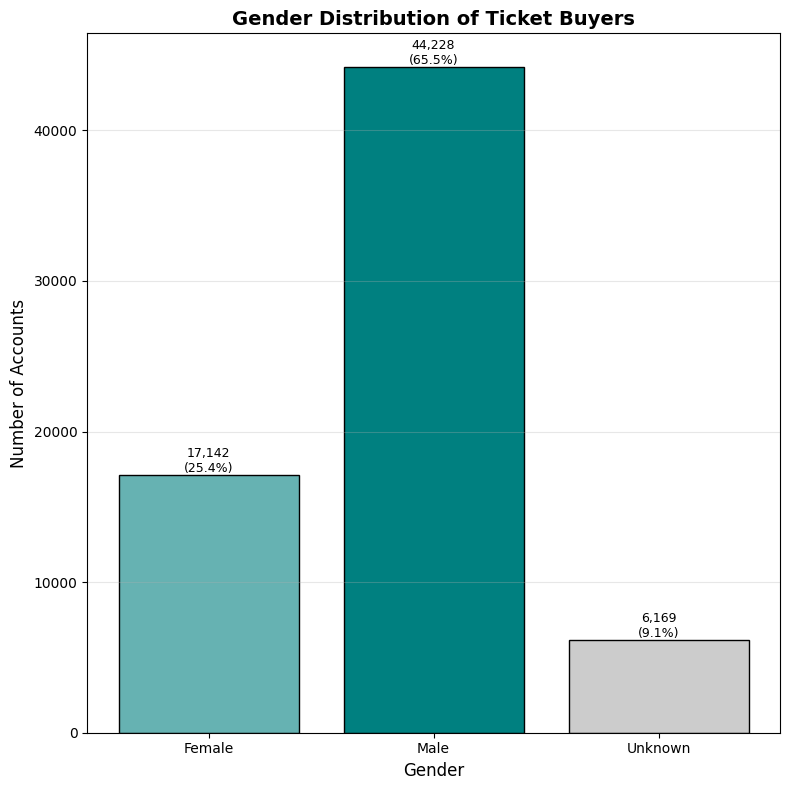

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load data ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# === Clean and unify 'gender' column ===
gender = df['gender'].fillna('Unknown')
gender = gender.replace({
    'Unknown/Unspecified': 'Unknown',
    'Unspecified': 'Unknown'
})

# === Summary table: counts + percentages ===
counts = gender.value_counts()
perc = (counts / counts.sum() * 100).round(2)

summary_table = (
    pd.DataFrame({'Gender': counts.index, 'Count': counts.values, 'Percent': perc.values})
    .sort_values('Count', ascending=False)
    .reset_index(drop=True)
)

print("===== Gender Summary Table =====")
print(summary_table.to_string(index=False))

# === Custom order for cleaner chart ===
desired_order = ["Female", "Male", "Nonbinary", "Other", "Unknown"]
present = [x for x in desired_order if x in summary_table['Gender'].values]
others = [x for x in summary_table['Gender'] if x not in present]
order = present + others

ordered = summary_table.set_index('Gender').loc[order].reset_index()

# === Bar chart: Gender distribution ===
plt.figure(figsize=(8, 8))
bars = plt.bar(
    ordered['Gender'],
    ordered['Count'],
    color=['#66b2b2' if g == 'Female' else '#008080' if g == 'Male' else '#CCCCCC' for g in ordered['Gender']],
    edgecolor='black',
    width=0.8
)

# Annotate count and percent above each bar
for bar, c, p in zip(bars, ordered['Count'], ordered['Percent']):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{c:,}\n({p:.1f}%)",
        ha='center', va='bottom', fontsize=9
    )

plt.title('Gender Distribution of Ticket Buyers', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Accounts', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# === Optional: export table/figure ===
# summary_table.to_csv("gender_summary_table.csv", index=False)
# plt.savefig("gender_distribution.png", dpi=300, bbox_inches='tight')
